In [9]:
import pandas as pd
import sqlite3

In [10]:
con = sqlite3.connect("../data/checking-logs.sqlite.sqlite copy")

## analyze only the users and not the admins

In [11]:
df1 = pd.io.sql.read_sql("SELECT datetime FROM pageviews WHERE uid LIKE 'user_%';", parse_dates=['datetime'], con=con)
df1 = df1.groupby(df1['datetime'].dt.date).count()
df1.rename(columns={'datetime' : 'views'}, inplace=True)
df1

,views
datetime,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1
2020-04-23,5
2020-04-25,1
2020-04-26,8
2020-04-28,2


In [12]:
df2 = pd.io.sql.read_sql("SELECT timestamp FROM checker WHERE uid LIKE 'user_%';", parse_dates=['timestamp'], con=con)
df2 = df2.groupby(df2['timestamp'].dt.date).count()
df2.rename(columns={'timestamp' : 'commits'}, inplace=True)
df2

,commits
timestamp,
2020-04-17,23
2020-04-18,69
2020-04-19,33
2020-04-20,25
2020-04-21,25
2020-04-22,28
2020-04-23,43
2020-04-24,16
2020-04-25,104


## analyze only the dates when there were both views and checker commits

In [13]:
new_df = pd.concat([df1, df2],axis=1,ignore_index=False)
new_df.dropna(inplace=True)
new_df

,views,commits
2020-04-17,1.0,23.0
2020-04-18,23.0,69.0
2020-04-19,15.0,33.0
2020-04-21,3.0,25.0
2020-04-22,1.0,28.0
2020-04-23,5.0,43.0
2020-04-25,1.0,104.0
2020-04-26,8.0,261.0
2020-04-28,2.0,5.0
2020-04-29,4.0,17.0


## In the graphic, use size of the font should be 8, the size of the figure is (15,8)

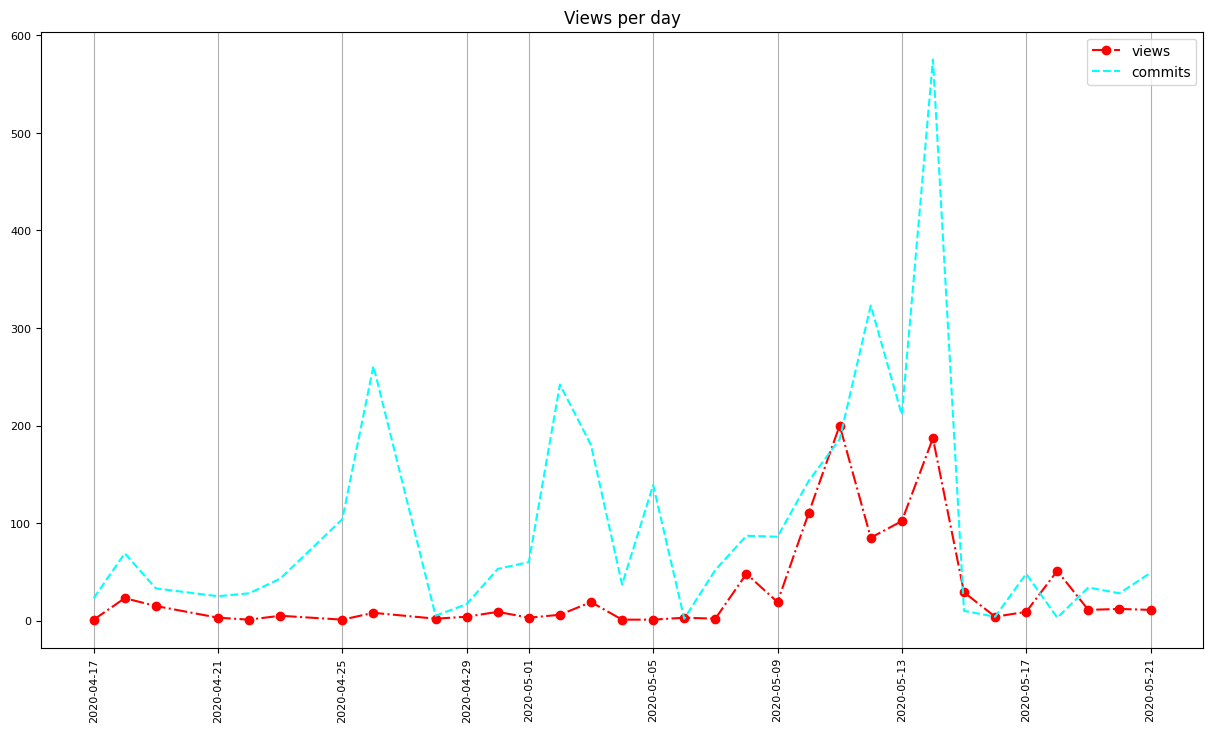

In [14]:
new_df.plot(fontsize=8, figsize=(15, 8), title='Views per day', rot=90, color=['red', 'cyan'], style=['o-.', '--']).grid(axis='x')

## How many times was the number of views larger than 150?

In [15]:
print(f"The answer is {new_df['views'][new_df['views'] > 150].count()}")

The answer is 2


In [16]:
con.close()